In [1]:
# импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn.linear_model import LinearRegression
from sklearn import metrics # метрики
from sklearn import model_selection # методы разделения и валидации

from sklearn import set_config
set_config(transform_output='pandas')

%matplotlib inline
plt.style.use('seaborn-darkgrid')
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (10, 8)

# [Загрузка](https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx) данных

In [2]:
data = pd.read_excel('data/data_ford_price.xlsx', engine='openpyxl')

In [3]:
data

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7012,22500,2015,3,6,23500,clean,automatic,rwd,full-size,32.680700,-117.169800,59.0
7013,5975,2005,2,8,0,clean,automatic,rwd,full-size,38.213303,-85.785762,50.0
7014,9999,2006,3,8,161514,clean,automatic,NaN,full-size,37.609783,-120.995406,59.0
7015,10900,2011,2,8,164000,clean,automatic,4wd,full-size,43.140600,-93.385000,47.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         7017 non-null   int64  
 1   year          7017 non-null   int64  
 2   condition     7017 non-null   int64  
 3   cylinders     7017 non-null   int64  
 4   odometer      7017 non-null   int64  
 5   title_status  7017 non-null   object 
 6   transmission  7017 non-null   object 
 7   drive         6626 non-null   object 
 8   size          5453 non-null   object 
 9   lat           7017 non-null   float64
 10  long          7017 non-null   float64
 11  weather       6837 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 658.0+ KB


In [5]:
TARGET = 'price'

In [6]:
X, y = data.drop(columns=TARGET), data[TARGET]

# Предобработка

In [7]:
# lr = LinearRegression()
# lr.fit(X, y)

Мы получим ошибку с комментарием о том, что не удалось превратить строковое значение в число с плавающей точкой (float).

Чтобы этой ошибки не возникало, необходимо закодировать данные.

In [8]:
data

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7012,22500,2015,3,6,23500,clean,automatic,rwd,full-size,32.680700,-117.169800,59.0
7013,5975,2005,2,8,0,clean,automatic,rwd,full-size,38.213303,-85.785762,50.0
7014,9999,2006,3,8,161514,clean,automatic,NaN,full-size,37.609783,-120.995406,59.0
7015,10900,2011,2,8,164000,clean,automatic,4wd,full-size,43.140600,-93.385000,47.0


In [9]:
data['cylinders'].value_counts()

cylinders
8     4816
6     2173
10      11
4       11
5        5
3        1
Name: count, dtype: int64

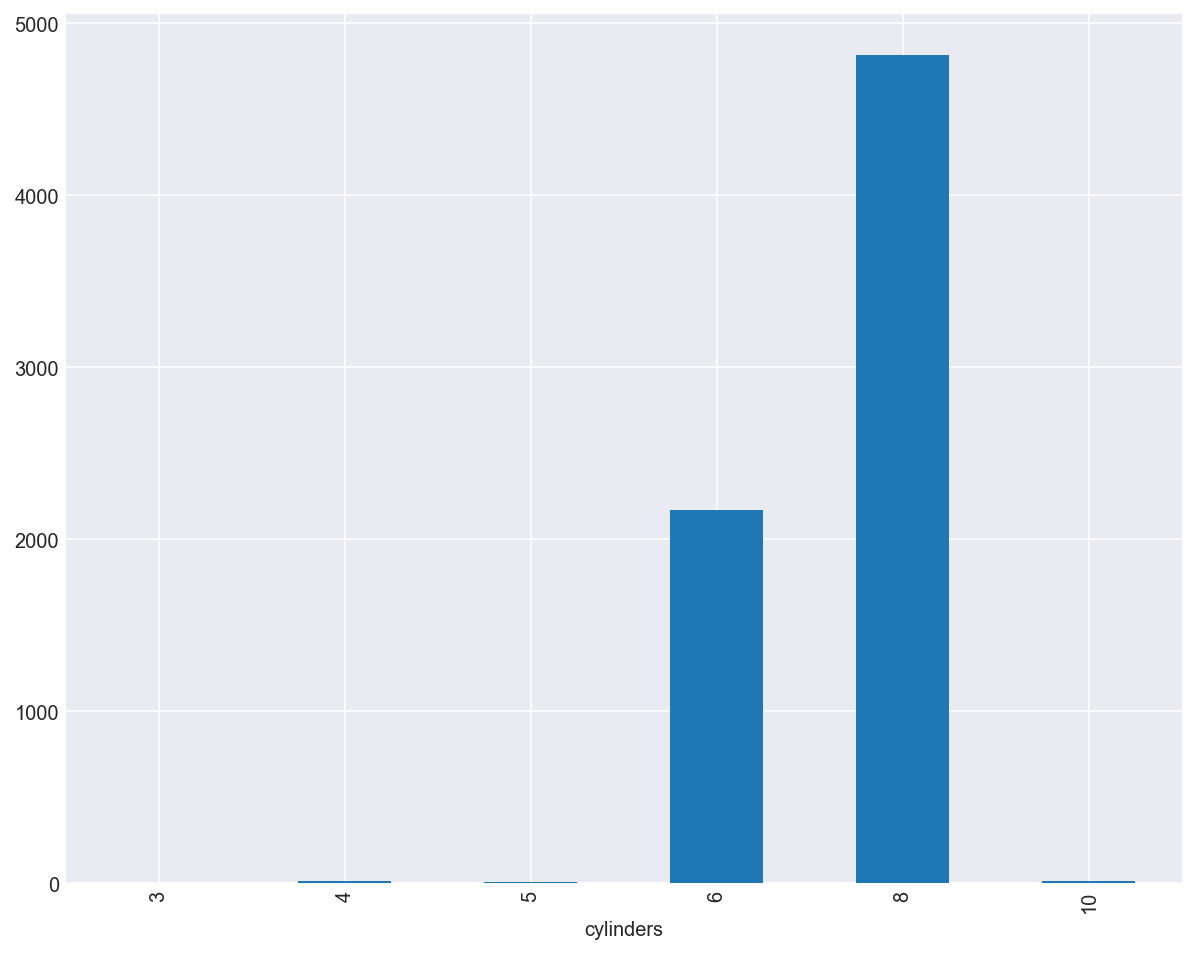

In [10]:
data['cylinders'].value_counts().sort_index().plot(kind='bar');

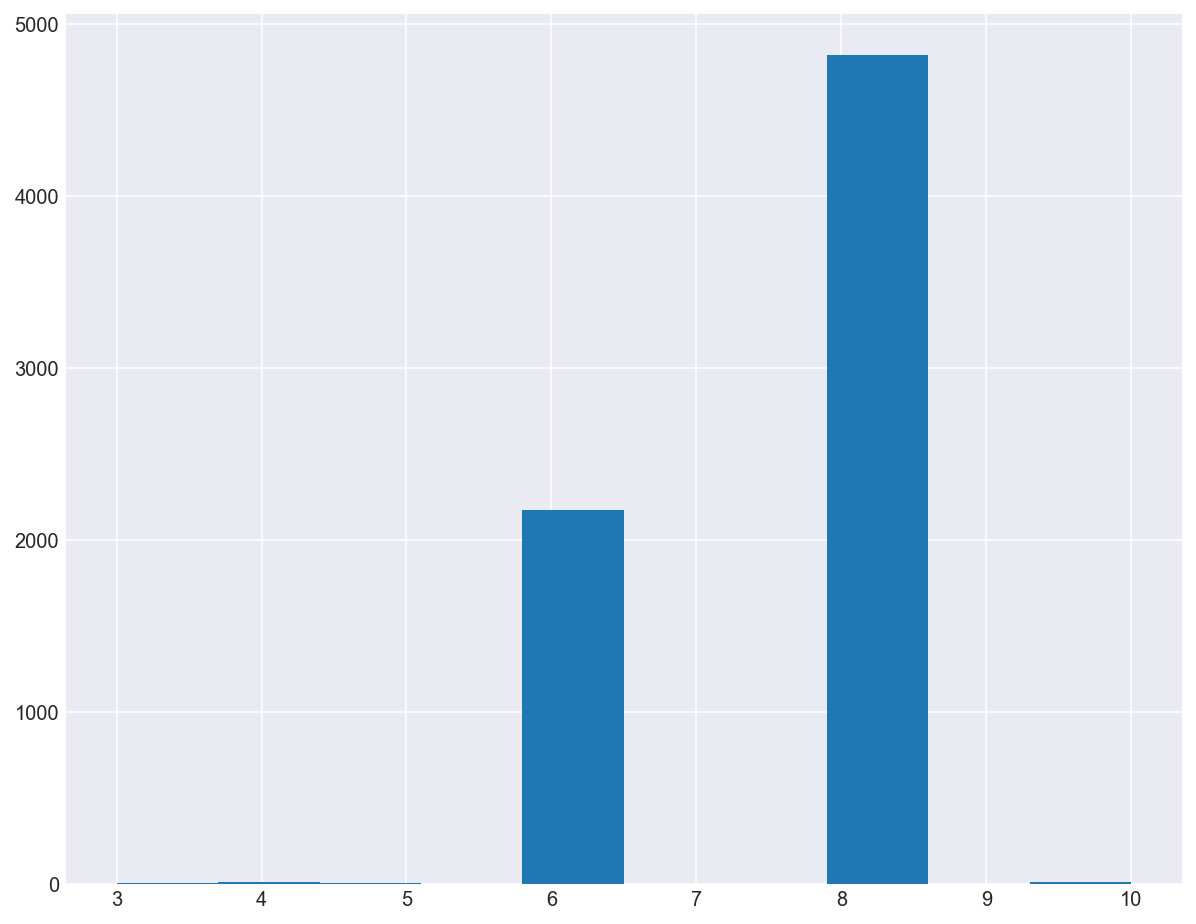

In [11]:
data['cylinders'].hist();

In [12]:
data['condition'].value_counts()

condition
3    3566
2    2613
4     472
1     338
5      17
0      11
Name: count, dtype: int64

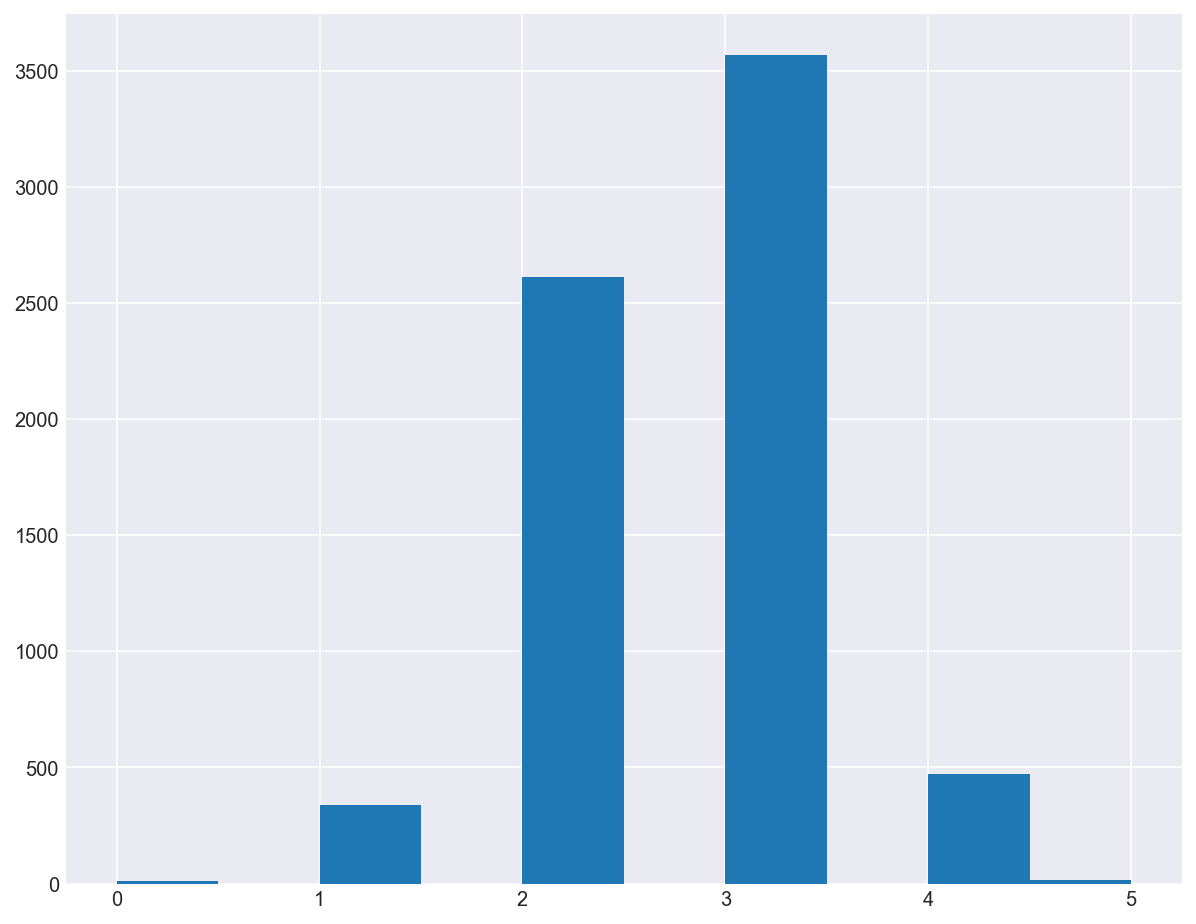

In [13]:
data['condition'].hist();

_______________________
Сторонний пример

In [14]:
from sklearn.preprocessing import LabelBinarizer
 
lb = LabelBinarizer()
 
education = ['нет', 'начальное', 'среднее', 'BSc', 'MSc', 'начальное', 'PhD']
lb.fit(education)
 
print('категории:', lb.classes_) 
lb.transform(['нет', 'MSc'])

категории: ['BSc' 'MSc' 'PhD' 'начальное' 'нет' 'среднее']


array([[0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0]])

___________________________________

Посмотрим на число уникальных значений номинальных признаков

In [15]:
columns_to_change = ['cylinders', 'title_status', 'transmission', 'drive', 'size']
 
for column in columns_to_change:
    print(f'Число уникальных значений призкака {column}: {data[column].nunique()}')

Число уникальных значений призкака cylinders: 6
Число уникальных значений призкака title_status: 5
Число уникальных значений призкака transmission: 3
Число уникальных значений призкака drive: 3
Число уникальных значений призкака size: 4


Итак, нам подходит однократное кодирование. 

Применим его к выбранным столбцам. 

Так как у нас нет отдельной тестовой выборки, то мы используем только один метод — fit_transform(). 

В качестве аргумента передаём таблицу с выбранными для преобразования признаками.

In [16]:
# from sklearn.preprocessing import OneHotEncoder
 
# one_hot_encoder = OneHotEncoder()
 
# # 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
# data_onehot = one_hot_encoder.fit_transform(data[columns_to_change]).toarray()

# # запишем полученные названия новых колонок в отдельную переменную
# column_names = one_hot_encoder.get_feature_names_out()
# one_hot_df = pd.DataFrame(data=data_onehot, columns=column_names)
# without_col_to_chane_df = data.drop(columns_to_change, axis=1)
# after_one_hot_df = pd.concat([without_col_to_chane_df, one_hot_df], axis=1)

Лучше использовать библиотеку category_encoders. Кодировщики проще устроены и не вызывают ошибок.

In [17]:
from category_encoders import OneHotEncoder, BinaryEncoder

In [18]:
# Все в две строки!
ohe = OneHotEncoder(cols=columns_to_change, use_cat_names=True)
data = ohe.fit_transform(data)

In [19]:
data

,price,year,condition,cylinders_6.0,cylinders_8.0,cylinders_10.0,cylinders_4.0,cylinders_5.0,cylinders_3.0,odometer,...,drive_fwd,drive_nan,size_full-size,size_nan,size_mid-size,size_compact,size_sub-compact,lat,long,weather
0,43900,2016,4,1,0,0,0,0,0,43500,...,0,0,1,0,0,0,0,36.471500,-82.483400,59.0
1,15490,2009,2,0,1,0,0,0,0,98131,...,0,0,1,0,0,0,0,40.468826,-74.281734,52.0
2,2495,2002,2,0,1,0,0,0,0,201803,...,0,0,1,0,0,0,0,42.477134,-82.949564,45.0
3,1300,2000,1,0,1,0,0,0,0,170305,...,0,0,1,0,0,0,0,40.764373,-82.349503,49.0
4,13865,2010,3,0,1,0,0,0,0,166062,...,0,0,0,1,0,0,0,49.210949,-123.114720,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7012,22500,2015,3,1,0,0,0,0,0,23500,...,0,0,1,0,0,0,0,32.680700,-117.169800,59.0
7013,5975,2005,2,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,38.213303,-85.785762,50.0
7014,9999,2006,3,0,1,0,0,0,0,161514,...,0,1,1,0,0,0,0,37.609783,-120.995406,59.0
7015,10900,2011,2,0,1,0,0,0,0,164000,...,0,0,1,0,0,0,0,43.140600,-93.385000,47.0
